In [9]:
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import sklearn
import sklearn.cluster
import itertools
import statistics
import cv2
import scipy

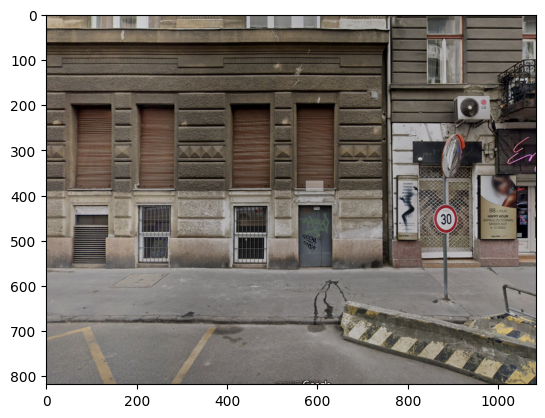

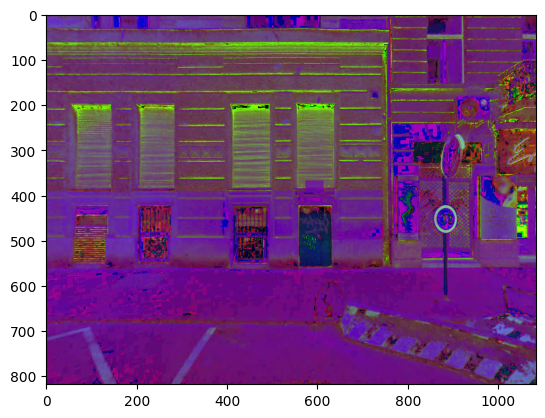

In [11]:
img_bgr = cv2.imread("./img/IMG_0001.png")
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.imshow(img)
plt.show()
plt.imshow(img_hsv)
plt.show()

**Target**

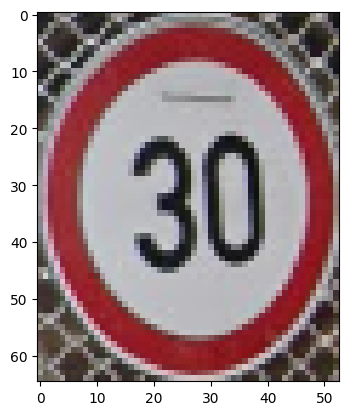

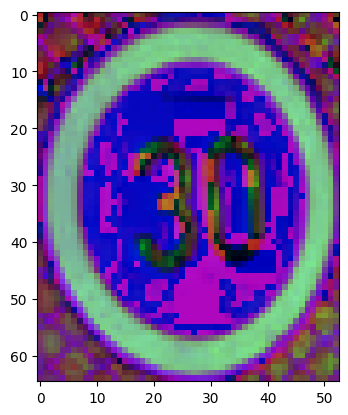

In [12]:
plt.imshow(img[420:485, 857:910])
plt.show()

plt.imshow(img_hsv[420:485, 857:910])
plt.show()

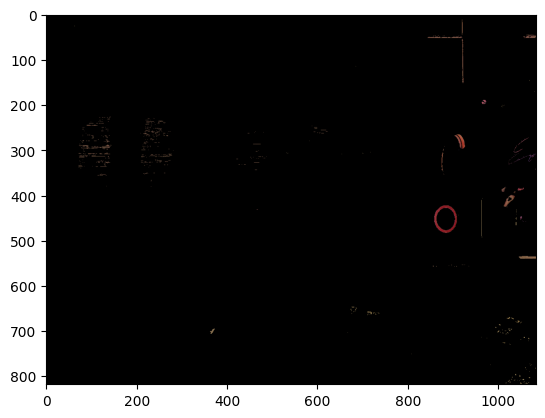

In [13]:
lower_red = np.array([100, 100, 100])
upper_red = np.array([255, 255, 255])

# Create a binary mask for the red color within the specified range
mask = cv2.inRange(img_hsv, lower_red, upper_red)

# Apply the mask to the original image to segment the red regions
red_segmented = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(red_segmented)
plt.show()

**Run pattern matching on this segmented image**

In [71]:
np.shape(red_segmented)
regions = measure.label(red_segmented,connectivity=2,background=50)
patches = measure.regionprops(regions)
print(f"{len(patches)} similarities")

10725 similarities


In [67]:
def inside(small, big):
    if small == None or big == None: return False

    sm = small.bbox
    bi = big.bbox

    smx  = sm[1]
    smy  = sm[0]
    smxx = sm[3]
    smyy = sm[2]

    bix  = bi[1]
    biy  = bi[0]
    bixx = bi[3]
    biyy = bi[2]

    return smx > bix and smy > biy and smxx < bixx and smyy < biyy

In [72]:
def clean_patches(patches):
    n_list = []

    for p in patches:
        rectangle = p.bbox
        width = abs(rectangle[1] - rectangle[3])
        height = abs(rectangle[0] - rectangle[2])
        ratio = height / (width + 1)
        area = width * height
        if(ratio < 3 and ratio > .33 and area > 10**2 and area < 10**5):
            n_list.append(p)

    # second : we don't want any patch inside another so let's delete those inside other patches
    # nn_list = []
    # for p in range(len(n_list)):
    #     to_add = True
    #     for i in range(len(n_list)):    
    #         if p != i and inside(n_list[p], n_list[i]):
    #             to_add = False        
    #             break
    #     if to_add: nn_list.append(n_list[p])
    
    return n_list

In [73]:
patches = clean_patches(patches)
print(f"after cleaning: {len(patches)} similarities")

after cleaning: 2171 similarities


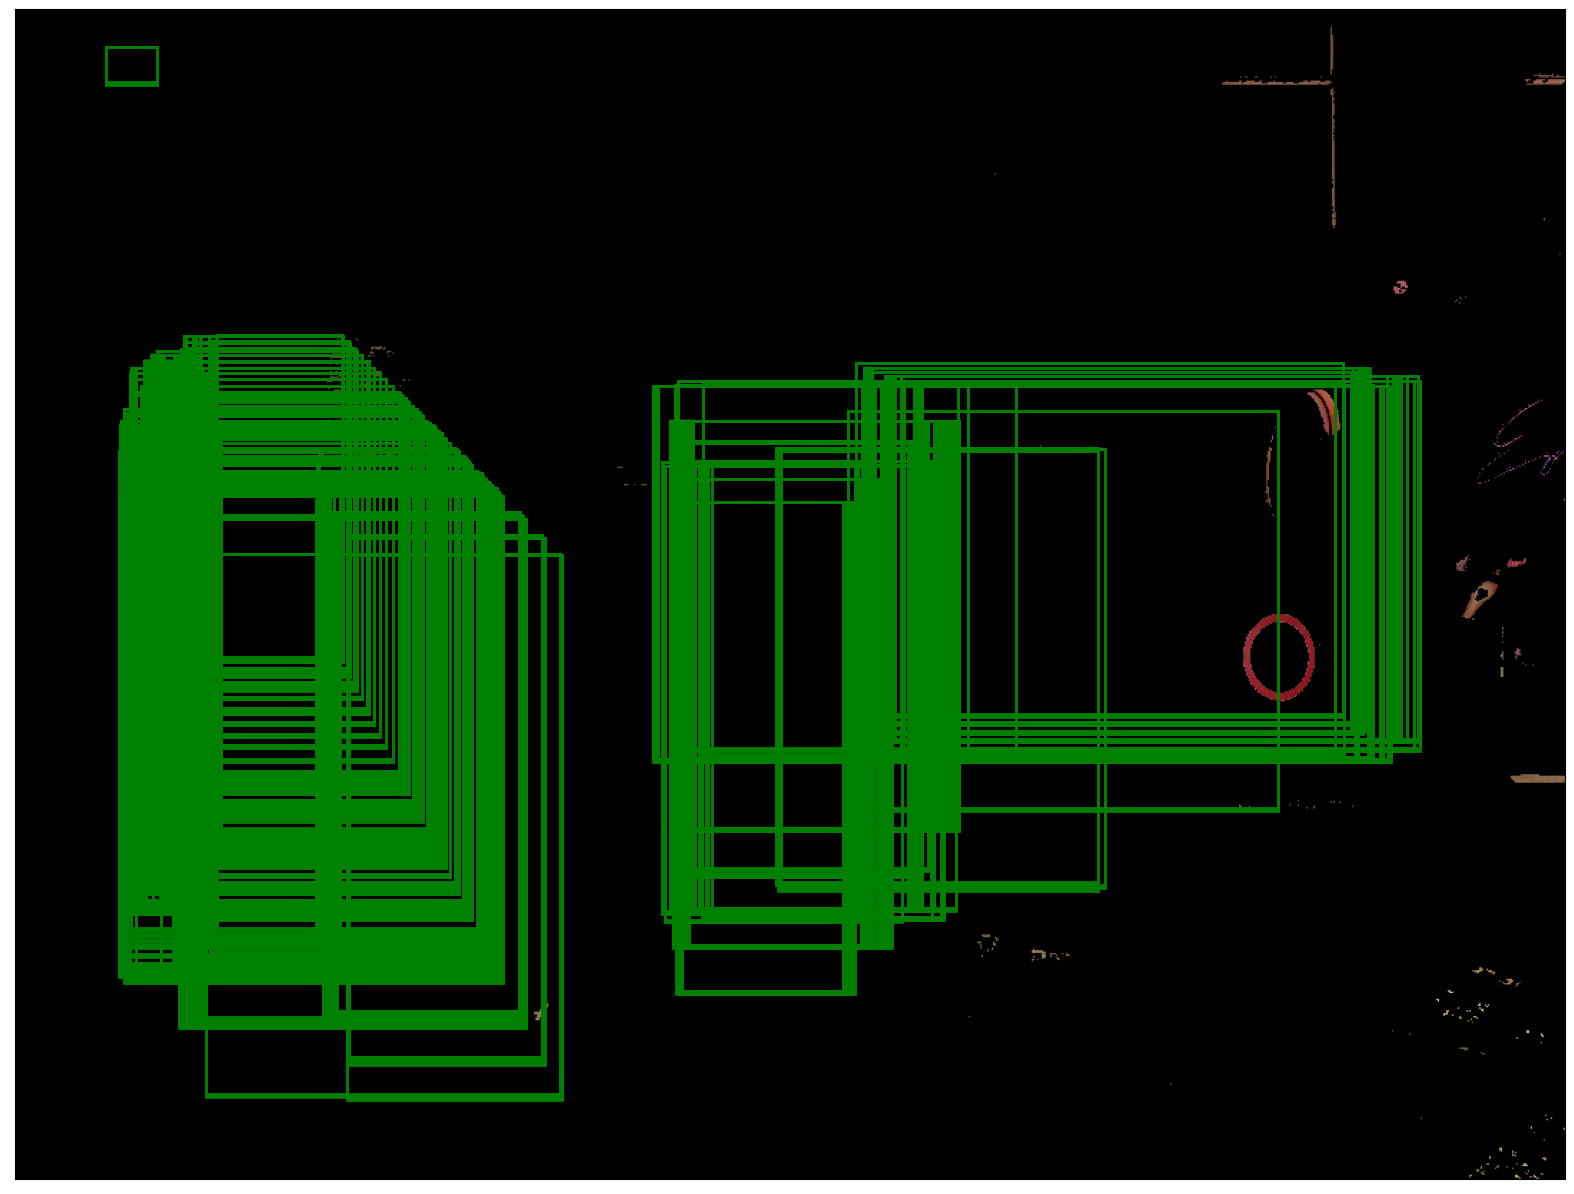

In [74]:
_, (ax1) = plt.subplots(1,figsize=(20,20))
plt.xticks([]),plt.yticks([])
ax1.imshow(red_segmented);

for region in patches:
    rectangle = region.bbox
    ax1.add_patch(matplotlib.patches.Rectangle((rectangle[1], rectangle[0]), abs(rectangle[1] - rectangle[3]), abs(rectangle[0] - rectangle[2]), edgecolor="green", linewidth=2, fill=False))
plt.show()